In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib as mpl

In [2]:
def find_index(x0, y0, x, y):
    dx = np.abs(x - x0)
    dy = np.abs(y - x0)
    xidx = np.argmin(dx)
    yidx = np.argmin(dy)
    return xidx, yidx
    

def make_gauss_bell(center_x, center_y, width, height, xgrid, ygrid, zgrid):
    #x0, y0 = find_index(center_x, center_y, xgrid[0,:], ygrid[:,0])
    bell_mountain = np.exp(-(
        np.square(xgrid - center_x) / (2 * width ** 2) + 
        np.square(ygrid - center_y) / (2 * width ** 2)))
    # bell_mountain = np.where(bell_mountain > 0.01, bell_mountain, 0.)
    zgrid += bell_mountain


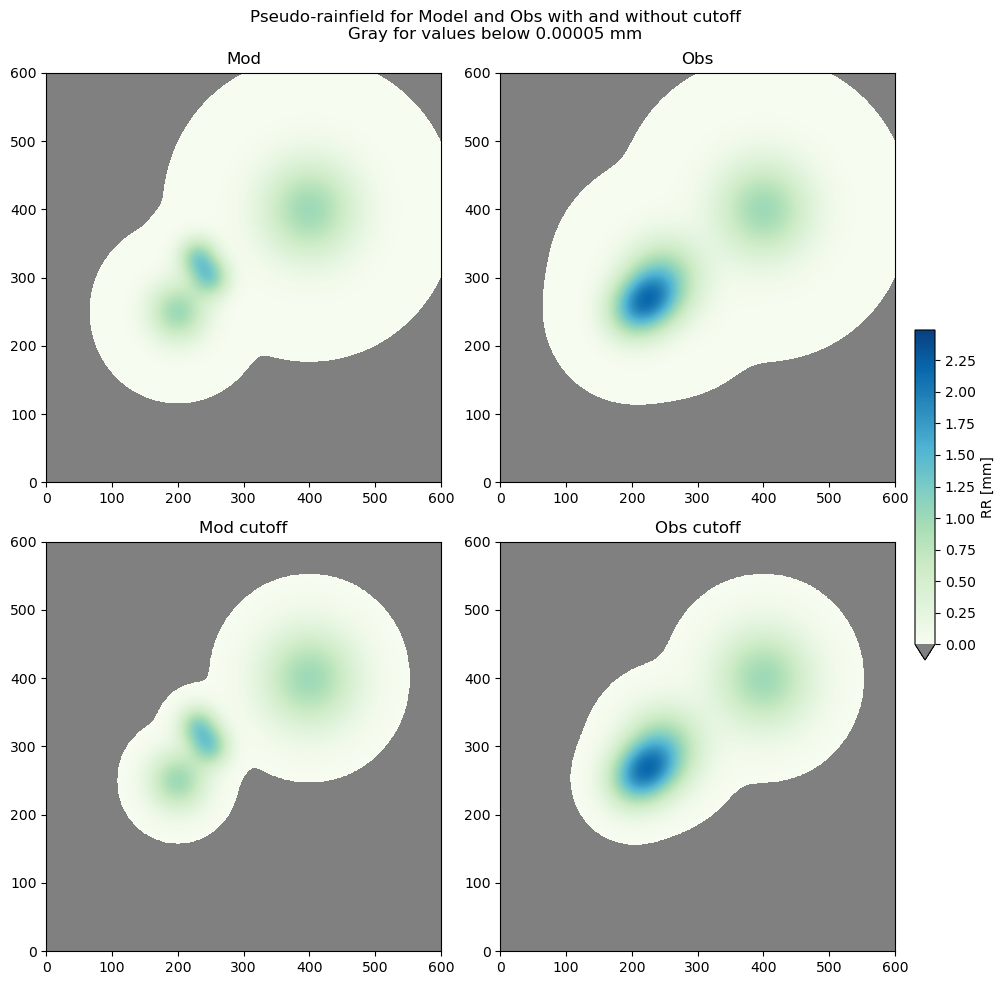

In [40]:
x = np.arange(-3., 3.01, 0.01)
y = x
xx, yy = np.meshgrid(x, y)
zz = np.zeros(xx.shape)
make_gauss_bell(1., 1., 0.5, 1., xx, yy, zz)
make_gauss_bell(-1., -0.5, 0.3, 1., xx, yy, zz)
make_gauss_bell(-0.5, 0., 0.2, 1., xx, yy, zz)
make_gauss_bell(-0.7, 0.3, 0.2, 1., xx, yy, zz)

zzo = np.zeros(xx.shape)
make_gauss_bell(1., 1., 0.5, 1.1, xx, yy, zzo)
make_gauss_bell(-1., -0.5, 0.3, 1.2, xx, yy, zzo)
make_gauss_bell(-0.5, 0., 0.4, 0.9, xx, yy, zzo)
make_gauss_bell(-0.7, -0.3, 0.3, 1.2, xx, yy, zzo)

zzc = np.where(zz < 0.01, 0., zz)
zzoc = np.where(zzo < 0.01, 0., zzo)

cmap = mpl.cm.GnBu
cmap.set_under(color="gray", alpha=1.)
fig, axs = plt.subplots(2,2, figsize=(10, 10))
levels = np.arange(0.00005, 2.5, 0.01)
# print(zz.min(), zzo.min(), zzc.min(), zzoc.min())
axs[0][0].contourf(zz, cmap=cmap, levels=levels, extend='min')
axs[0][0].set_title("Mod")
axs[0][1].contourf(zzo, cmap=cmap, levels=levels, extend='min')
axs[0][1].set_title("Obs")
axs[1][0].contourf(zzc, cmap=cmap, levels=levels, extend='min')
axs[1][0].set_title("Mod cutoff")
c = axs[1][1].contourf(zzoc, cmap=cmap, levels=levels, extend='min')
axs[1][1].set_title("Obs cutoff")
plt.suptitle("Pseudo-rainfield for Model and Obs with and without cutoff\nGray for values below 0.00005 mm")
plt.tight_layout()
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.33, 0.02, 0.33])
plt.colorbar(c, cax=cax, label="RR [mm]")


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02041674 0.05049909 0.11113607
 0.24772366 0.53526143 0.92533449] [ 1.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.
 90. 95. 99.]


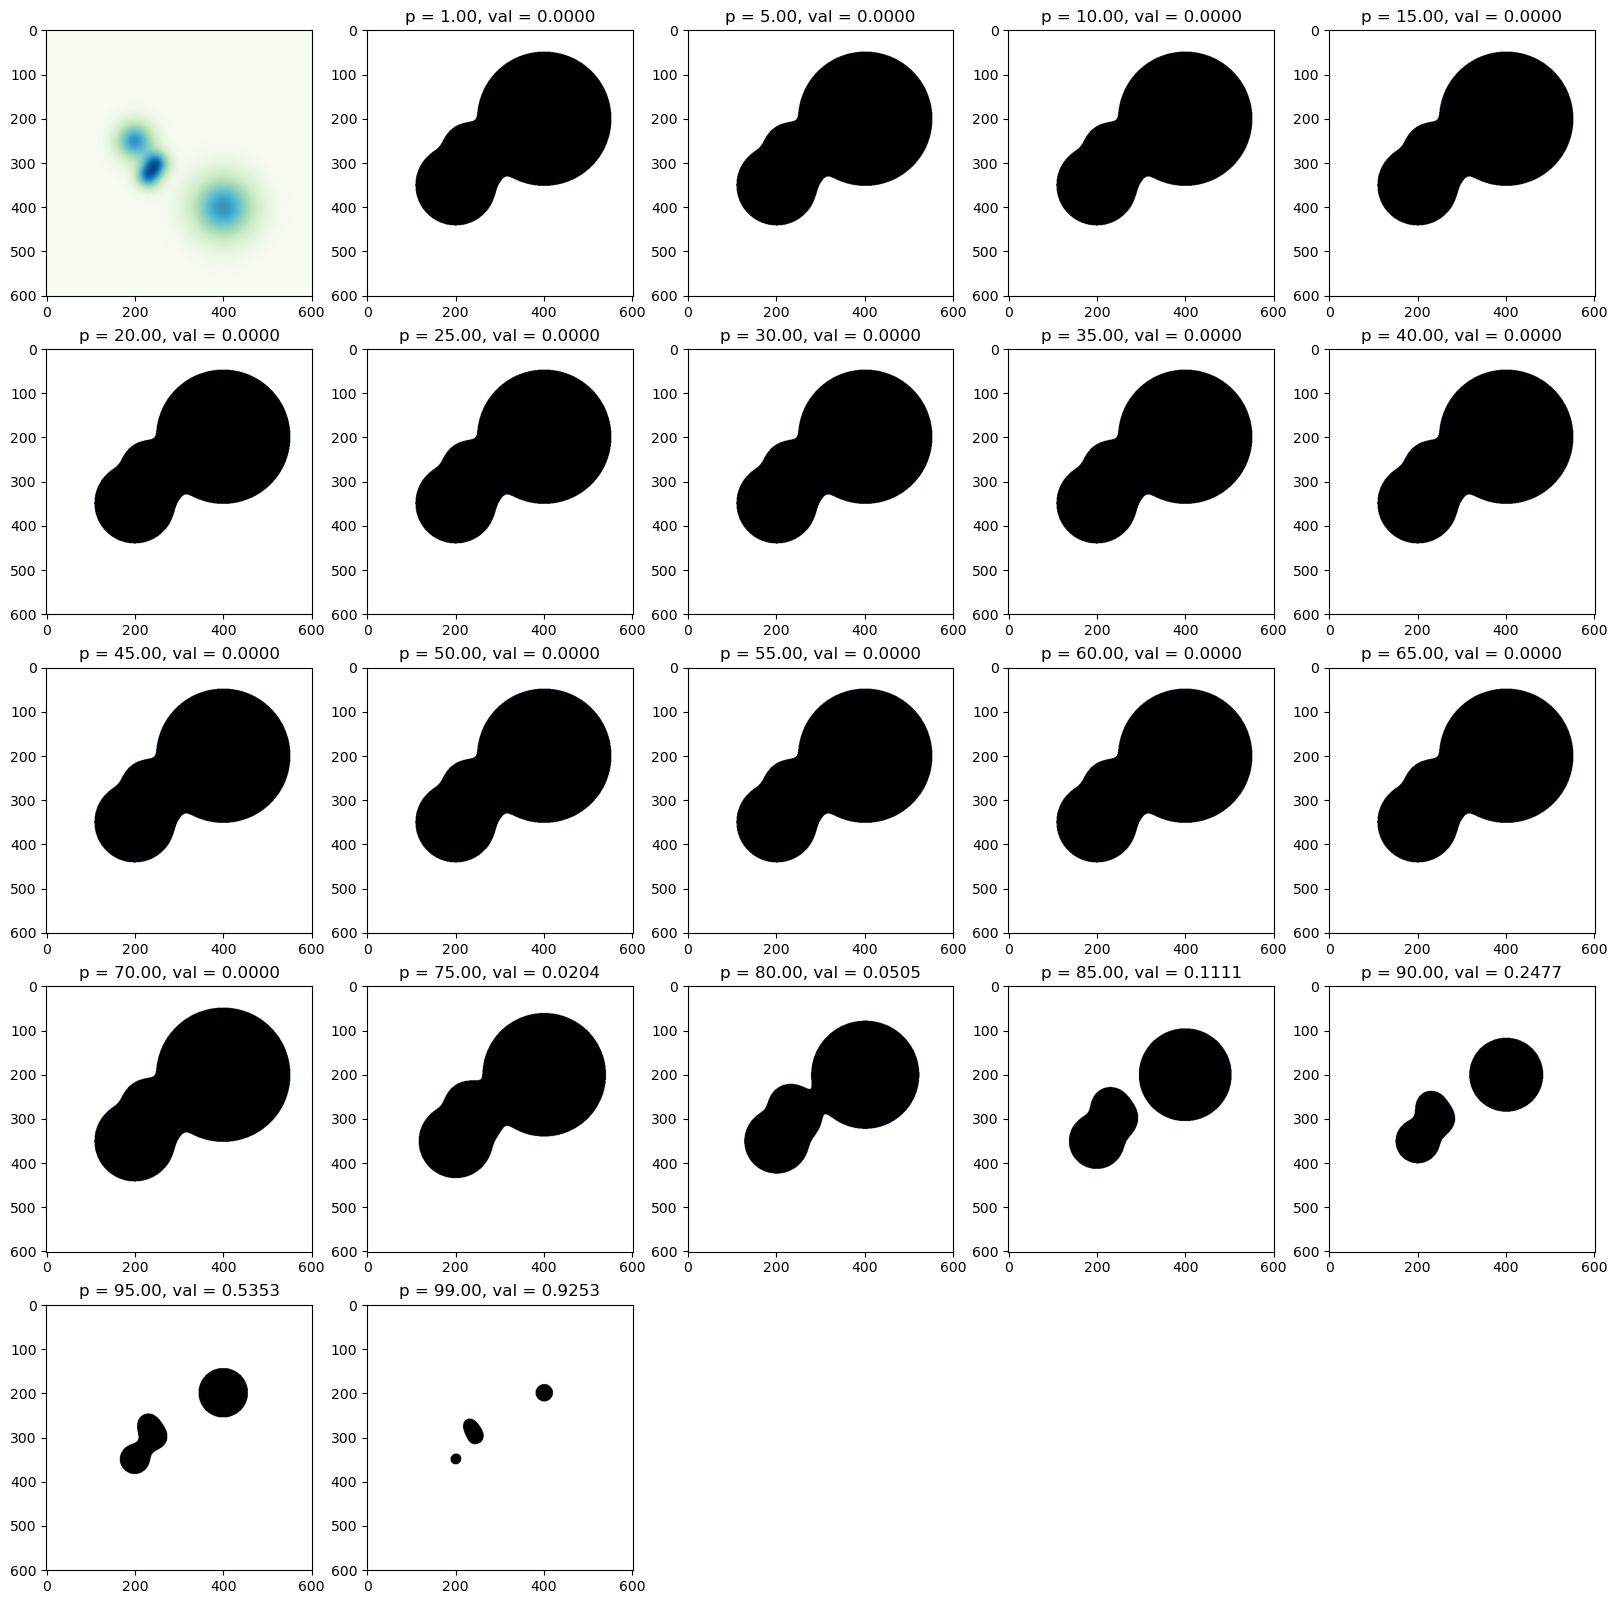

In [22]:
percs = np.arange(0., 100.01, 5.)
percs[-1] = 99.
percs[0] = 1.
zzp = np.percentile(zzc.flatten(), percs)
print(zzp, percs)
ii = 1
fig, axs = plt.subplots(5, 5, figsize=(20,20))
axs.flatten()[0].imshow(zz, cmap="GnBu")
for p in zzp:
    ptmp = np.where(zzc > p, 1., 0.)
    axs.flatten()[ii].imshow(np.flip(ptmp, axis=0), cmap="bone_r")
    axs.flatten()[ii].set_title("p = {:.2f}, val = {:.4f}".format(percs[ii-1], p))
    ii += 1
    
for jj in range(ii, len(axs.flatten())):
    axs.flatten()[jj].axis('off')

In [48]:
win = 100
threshold = 35.
fm = signal.fftconvolve(zz > np.percentile(zz, threshold), np.ones([win ,win]), mode='same')
fm2 = signal.fftconvolve(zzc > np.percentile(zzc, threshold), np.ones([win ,win]), mode='same')
fo = signal.fftconvolve(zzo > np.percentile(zzo, threshold), np.ones([win ,win]), mode='same')
fo2 = signal.fftconvolve(zzoc > np.percentile(zzoc, threshold), np.ones([win ,win]), mode='same')

num = []
denom = []
for obs in [fo, fo2]:
    for mod in [fm, fm2]:
        num.append(np.nanmean(np.power(mod - obs, 2)))
        denom.append(np.nanmean(np.power(mod, 2) + np.power(obs, 2)))

10000.000000000005 -3.679299060209298e-12


Text(0.0, 1.0, 'FSS for 35th percentile: 0.988\nAvg of sqr: 589279.317')

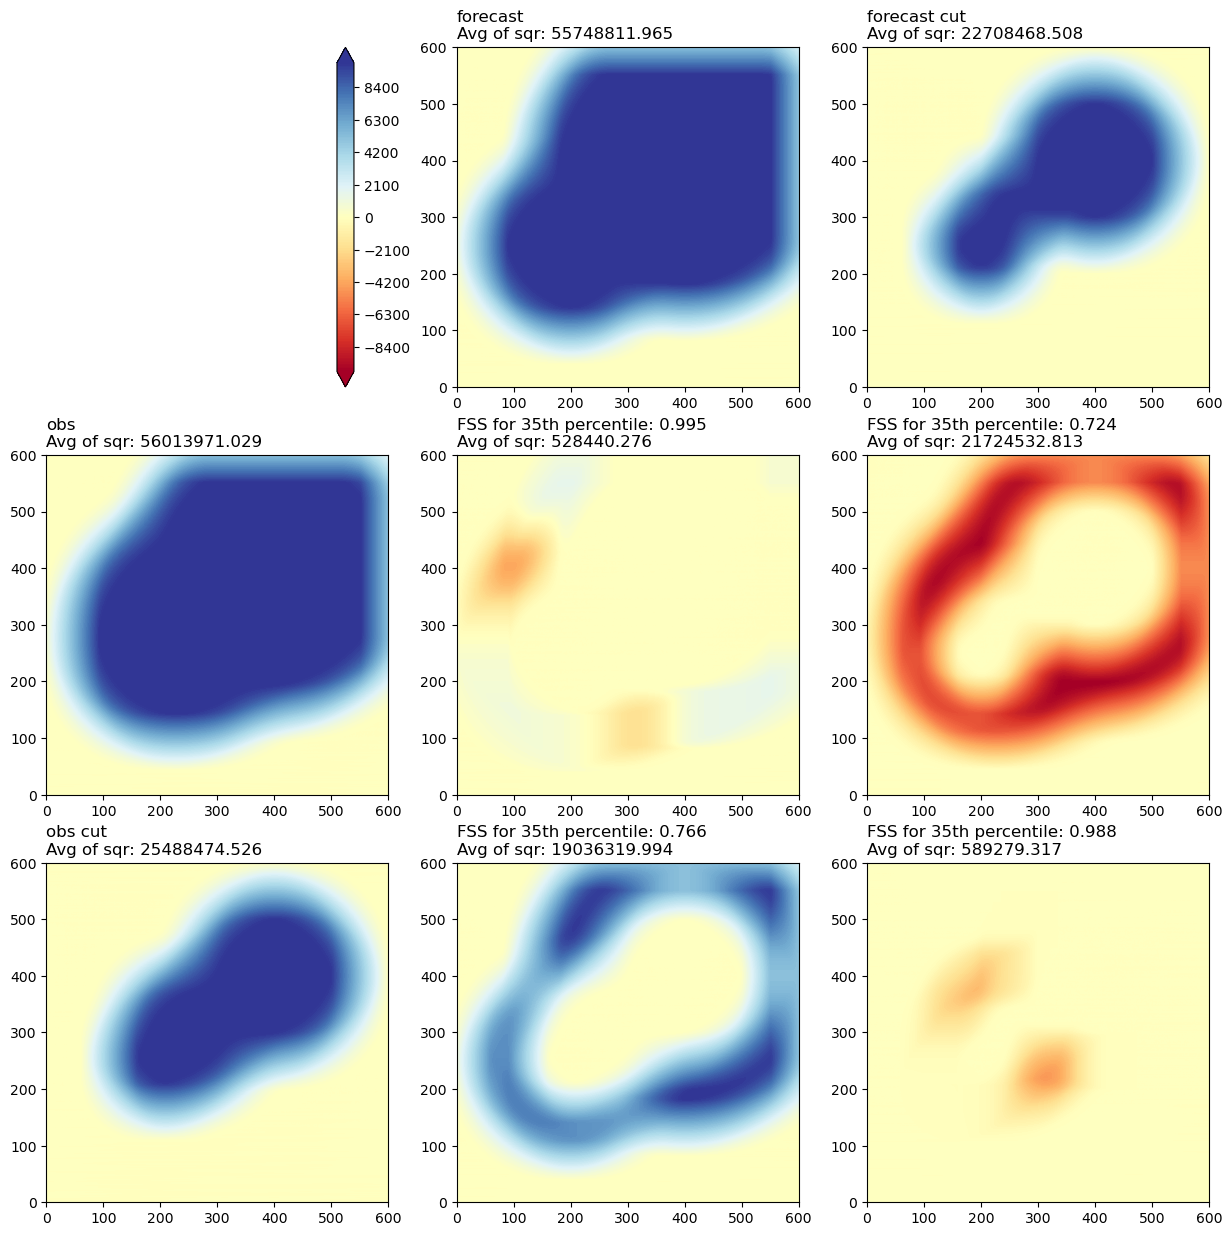

In [49]:
for field in [fm, fm2, fo, fo2]:
    field = np.where(field > 100., 100., field)
    field = np.where(field < -100., -100., field)

print(fo.max(), fo.min())
levels=np.arange(-win**2., win**2 *1.001, 0.01*win**2)
cmap = plt.cm.RdYlBu
extend='both'
fig, axs = plt.subplots(3, 3, figsize=(15,15))
axs[0][0].axis('off')
axs[0][1].contourf(fm, levels=levels, cmap=cmap, extend=extend)
axs[0][2].contourf(fm2, levels=levels, cmap=cmap, extend=extend)
axs[1][0].contourf(fo, levels=levels, cmap=cmap, extend=extend)
axs[2][0].contourf(fo2, levels=levels, cmap=cmap, extend=extend)
axs[0][1].set_title("forecast\nAvg of sqr: {:.3f}".format(np.nanmean(np.power(fm, 2))), loc='left')
axs[0][2].set_title("forecast cut\nAvg of sqr: {:.3f}".format(np.nanmean(np.power(fm2, 2))), loc='left')
axs[1][0].set_title("obs\nAvg of sqr: {:.3f}".format(np.nanmean(np.power(fo, 2))), loc='left')
axs[2][0].set_title("obs cut\nAvg of sqr: {:.3f}".format(np.nanmean(np.power(fo2, 2))), loc='left')


axs[1][1].contourf(fm - fo, levels=levels, cmap=cmap, extend=extend)
axs[1][2].contourf(fm2 - fo, levels=levels, cmap=cmap, extend=extend)
axs[2][1].contourf(fm - fo2, levels=levels, cmap=cmap, extend=extend)
img = axs[2][2].contourf(fm2 - fo2, levels=levels, cmap=cmap, extend=extend)

plt.colorbar(img, ax = axs[0][0])

axs[1][1].set_title("FSS for 35th percentile: {:.3f}\nAvg of sqr: {:.3f}".format(1. - num[0]/denom[0], num[0]),
                   loc='left')
axs[1][2].set_title("FSS for 35th percentile: {:.3f}\nAvg of sqr: {:.3f}".format(1. - num[1]/denom[1], num[1]),
                   loc='left')
axs[2][1].set_title("FSS for 35th percentile: {:.3f}\nAvg of sqr: {:.3f}".format(1. - num[2]/denom[2], num[2]),
                   loc='left')
axs[2][2].set_title("FSS for 35th percentile: {:.3f}\nAvg of sqr: {:.3f}".format(1. - num[3]/denom[3], num[3]),
                   loc='left')


In [52]:
win = 100
threshold = 35.
mode = 'valid'
fm = signal.convolve(zz > np.percentile(zz, threshold), np.ones([win ,win]), mode='valid')
fm2 = signal.convolve(zzc > np.percentile(zzc, threshold), np.ones([win ,win]), mode='valid')
fo = signal.convolve(zzo > np.percentile(zzo, threshold), np.ones([win ,win]), mode='valid')
fo2 = signal.convolve(zzoc > np.percentile(zzoc, threshold), np.ones([win ,win]), mode='valid')

num = []
denom = []
for obs in [fo, fo2]:
    for mod in [fm, fm2]:
        num.append(np.nanmean(np.power(mod - obs, 2)))
        denom.append(np.nanmean(np.power(mod, 2) + np.power(obs, 2)))

10000.000000000005 -2.9319414386042842e-12


Text(0.0, 1.0, 'FSS for 35th percentile: 0.988\nAvg of sqr: 844622.619')

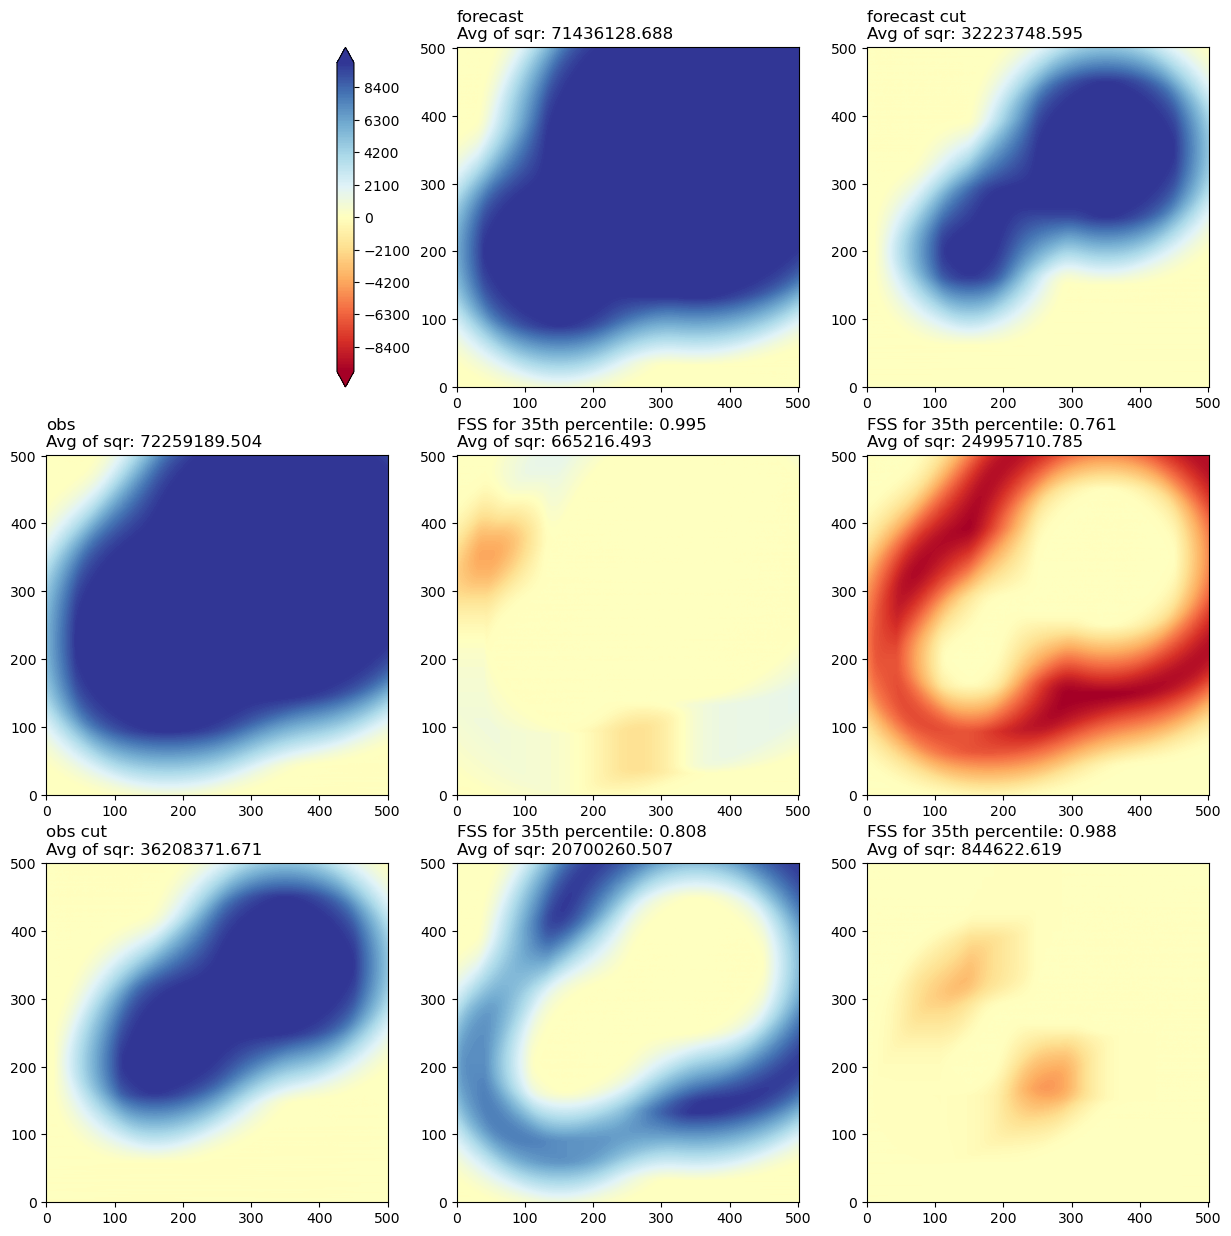

In [53]:
for field in [fm, fm2, fo, fo2]:
    field = np.where(field > 100., 100., field)
    field = np.where(field < -100., -100., field)

print(fo.max(), fo.min())
levels=np.arange(-win**2., win**2 *1.001, 0.01*win**2)
cmap = plt.cm.RdYlBu
extend='both'
fig, axs = plt.subplots(3, 3, figsize=(15,15))
axs[0][0].axis('off')
axs[0][1].contourf(fm, levels=levels, cmap=cmap, extend=extend)
axs[0][2].contourf(fm2, levels=levels, cmap=cmap, extend=extend)
axs[1][0].contourf(fo, levels=levels, cmap=cmap, extend=extend)
axs[2][0].contourf(fo2, levels=levels, cmap=cmap, extend=extend)
axs[0][1].set_title("forecast\nAvg of sqr: {:.3f}".format(np.nanmean(np.power(fm, 2))), loc='left')
axs[0][2].set_title("forecast cut\nAvg of sqr: {:.3f}".format(np.nanmean(np.power(fm2, 2))), loc='left')
axs[1][0].set_title("obs\nAvg of sqr: {:.3f}".format(np.nanmean(np.power(fo, 2))), loc='left')
axs[2][0].set_title("obs cut\nAvg of sqr: {:.3f}".format(np.nanmean(np.power(fo2, 2))), loc='left')


axs[1][1].contourf(fm - fo, levels=levels, cmap=cmap, extend=extend)
axs[1][2].contourf(fm2 - fo, levels=levels, cmap=cmap, extend=extend)
axs[2][1].contourf(fm - fo2, levels=levels, cmap=cmap, extend=extend)
img = axs[2][2].contourf(fm2 - fo2, levels=levels, cmap=cmap, extend=extend)

plt.colorbar(img, ax = axs[0][0])

axs[1][1].set_title("FSS for 35th percentile: {:.3f}\nAvg of sqr: {:.3f}".format(1. - num[0]/denom[0], num[0]),
                   loc='left')
axs[1][2].set_title("FSS for 35th percentile: {:.3f}\nAvg of sqr: {:.3f}".format(1. - num[1]/denom[1], num[1]),
                   loc='left')
axs[2][1].set_title("FSS for 35th percentile: {:.3f}\nAvg of sqr: {:.3f}".format(1. - num[2]/denom[2], num[2]),
                   loc='left')
axs[2][2].set_title("FSS for 35th percentile: {:.3f}\nAvg of sqr: {:.3f}".format(1. - num[3]/denom[3], num[3]),
                   loc='left')
